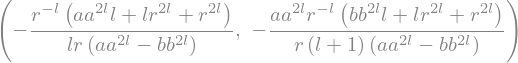

In [1]:
import sympy as sp

# Symbols
l, a, b, r = sp.symbols('l a b r', positive=True)
A_l, B_l = sp.symbols('A_l B_l')

# Equations
eq1 = sp.Eq(l*a**(l-1)/r**(l+1) + l*A_l*a**(l-1) - (l+1)*B_l*a**-(l+2), 0)
eq2 = sp.Eq(-(l+1)*r**(l-1)/b**(l+2) + l*A_l*b**(l-1) - (l+1)*B_l*b**-(l+2), 0)

# Solve
sol = sp.solve([eq1, eq2], (A_l, B_l), dict=True)
A_l_sol = sol[0][A_l]
B_l_sol = sol[0][B_l]

# Try to get the "nicer" form
A_l_sol = sp.factor(sp.together(A_l_sol))
B_l_sol = sp.factor(sp.together(B_l_sol))

# Pretty print
sp.init_printing(use_latex=True)
A_l_sol, B_l_sol